In [1]:
import pandas as pd
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
import statsmodels.api as sm
import matplotlib
from pylab import rcParams

In [2]:
# Read the data file
df = pd.read_excel("/content/Superstore.xls")

In [ ]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2013-138688,2013-06-13,2013-06-17,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


### Analysing Office Supply category
There are three categories of sales: Furniture, Office Supply and Technology.
We will work on time series analysis and forecasting for furniture sales.

In [7]:
df_office = df.loc[df['Category'] == 'Office Supplies']
df_office

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2,3,CA-2013-138688,2013-06-13,2013-06-17,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,0.0,6.8714
4,5,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368,2,0.2,2.5164
6,7,CA-2011-115812,2011-06-09,2011-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.280,4,0.0,1.9656
8,9,CA-2011-115812,2011-06-09,2011-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.504,3,0.2,5.7825
9,10,CA-2011-115812,2011-06-09,2011-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.900,5,0.0,34.4700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9982,9983,US-2013-157728,2013-09-23,2013-09-29,Standard Class,RC-19960,Ryan Crowe,Consumer,United States,Grand Rapids,...,49505,Central,OFF-PA-10002195,Office Supplies,Paper,"RSVP Cards & Envelopes, Blank White, 8-1/2"" X ...",35.560,7,0.0,16.7132
9984,9985,CA-2012-100251,2012-05-17,2012-05-23,Standard Class,DV-13465,Dianna Vittorini,Consumer,United States,Long Beach,...,11561,East,OFF-LA-10003766,Office Supplies,Labels,Self-Adhesive Removable Labels,31.500,10,0.0,15.1200
9985,9986,CA-2012-100251,2012-05-17,2012-05-23,Standard Class,DV-13465,Dianna Vittorini,Consumer,United States,Long Beach,...,11561,East,OFF-SU-10000898,Office Supplies,Supplies,Acme Hot Forged Carbon Steel Scissors with Nic...,55.600,4,0.0,16.1240
9992,9993,CA-2014-121258,2014-02-27,2014-03-04,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200


In [8]:
# Lets look at the range of sales of data
print("Min Sale date: ",df_office['Order Date'].min())
print("Max Sale date: ", df_office['Order Date'].max())

Min Sale date:  2011-01-04 00:00:00
Max Sale date:  2014-12-31 00:00:00


In [9]:
# Check for null values, we focus on order date and sales column and make sure there are no missing values.
df_office.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [10]:
columns = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Quantity', 'Discount', 'Profit']
df_office.drop(columns, axis=1, inplace=True)

In [11]:
df_office.head()

,Order Date,Sales
2,2013-06-13,14.620
4,2012-10-11,22.368
6,2011-06-09,7.280
8,2011-06-09,18.504
9,2011-06-09,114.900


In [12]:
df_office = df_office.groupby('Order Date')['Sales'].sum().reset_index()
df_office = df_office.set_index('Order Date')
df_office.index

DatetimeIndex(['2011-01-04', '2011-01-05', '2011-01-06', '2011-01-07',
               '2011-01-08', '2011-01-10', '2011-01-11', '2011-01-14',
               '2011-01-17', '2011-01-19',
               ...
               '2014-12-22', '2014-12-23', '2014-12-24', '2014-12-25',
               '2014-12-26', '2014-12-27', '2014-12-28', '2014-12-29',
               '2014-12-30', '2014-12-31'],
              dtype='datetime64[ns]', name='Order Date', length=1149, freq=None)

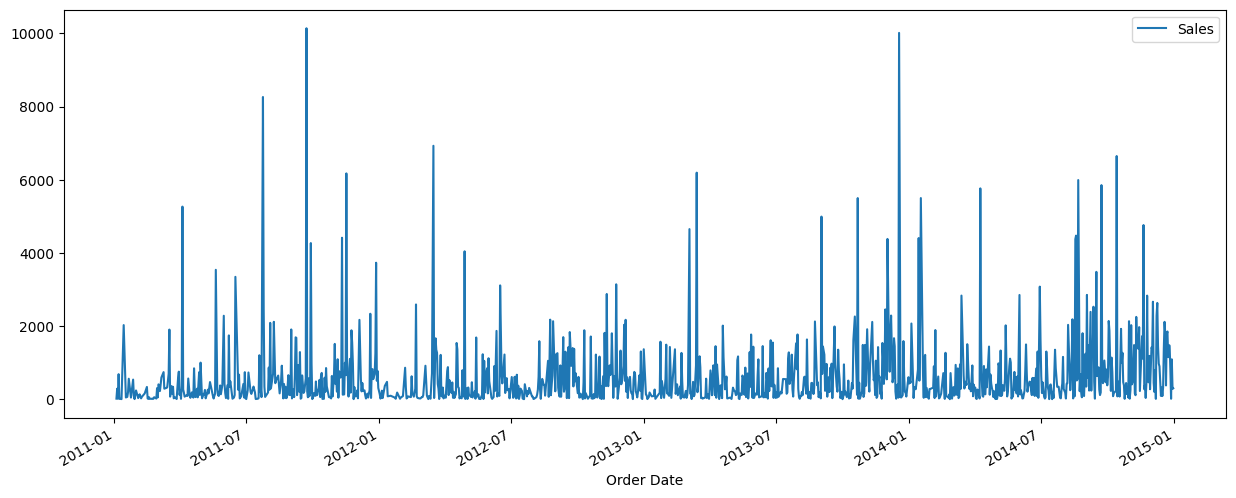

In [13]:
# Plot the sales data
df_office.plot(figsize=(15, 6))
plt.show()

In [14]:
# Since it's really hard to read the sales data in current format, we will resample the data on Monthly basis

df_office = df_office['Sales'].resample('MS').mean()
df_office

Order Date
2011-01-01     285.357647
2011-02-01      63.042588
2011-03-01     391.176318
2011-04-01     464.794750
2011-05-01     324.346545
2011-06-01     588.774409
2011-07-01     756.060400
2011-08-01     541.879143
2011-09-01    1015.677704
2011-10-01     267.078815
2011-11-01     959.372714
2011-12-01     692.556231
2012-01-01     129.198571
2012-02-01     319.222765
2012-03-01     687.992478
2012-04-01     502.342320
2012-05-01     364.549440
2012-06-01     560.407737
2012-07-01     205.214739
2012-08-01     558.814667
2012-09-01     772.230680
2012-10-01     361.392083
2012-11-01     757.790357
2012-12-01     540.055800
2013-01-01     331.230125
2013-02-01     371.291444
2013-03-01     671.462885
2013-04-01     483.624318
2013-05-01     448.513724
2013-06-01     436.074240
2013-07-01     576.239727
2013-08-01     354.573538
2013-09-01     831.633643
2013-10-01     616.624333
2013-11-01     824.156615
2013-12-01    1361.148357
2014-01-01     943.638304
2014-02-01     410.564000
2

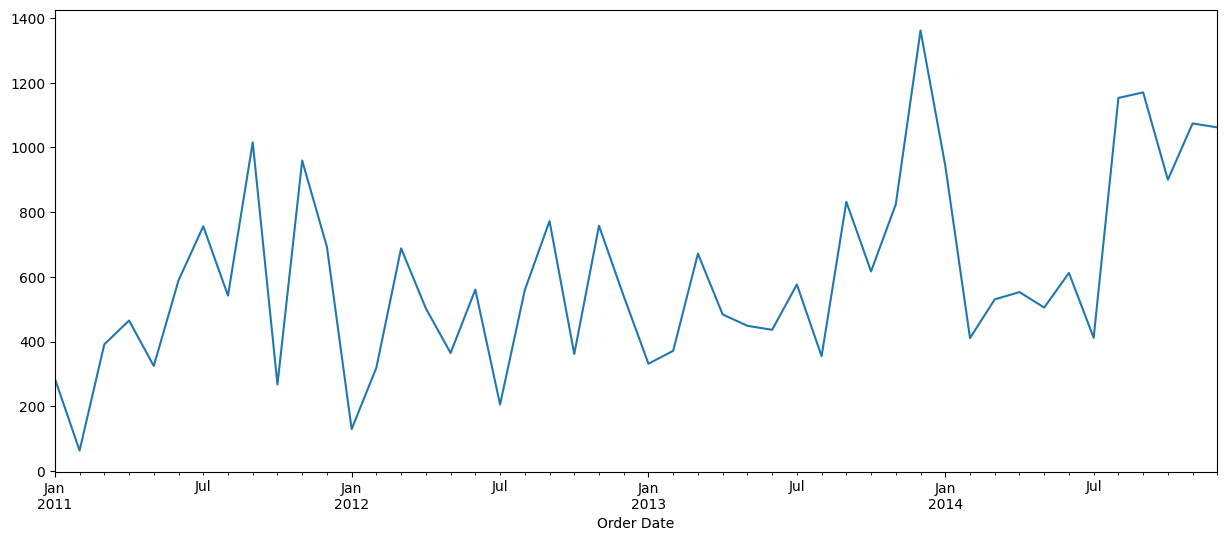

In [15]:
# Plot the sales data
df_office.plot(figsize=(15, 6))
plt.show()

### Time Decomposition

Distinctive patterns emerge when visualizing the data. The time series exhibits a seasonal pattern, with sales consistently starting low at the beginning of each year and peaking at the year's end. Within each individual year, there is a consistent upward trend, interspersed with a few months of lower sales in the middle of the year.

Time Series decomposition allows us to decompose our time series into three distinct components: trend, seasonality, and noise.

In essence, time decomposition is like taking apart a puzzle to see its individual pieces. It helps us grasp the different elements that contribute to the overall pattern of the time series, leading to a more informed understanding and better decision-making.

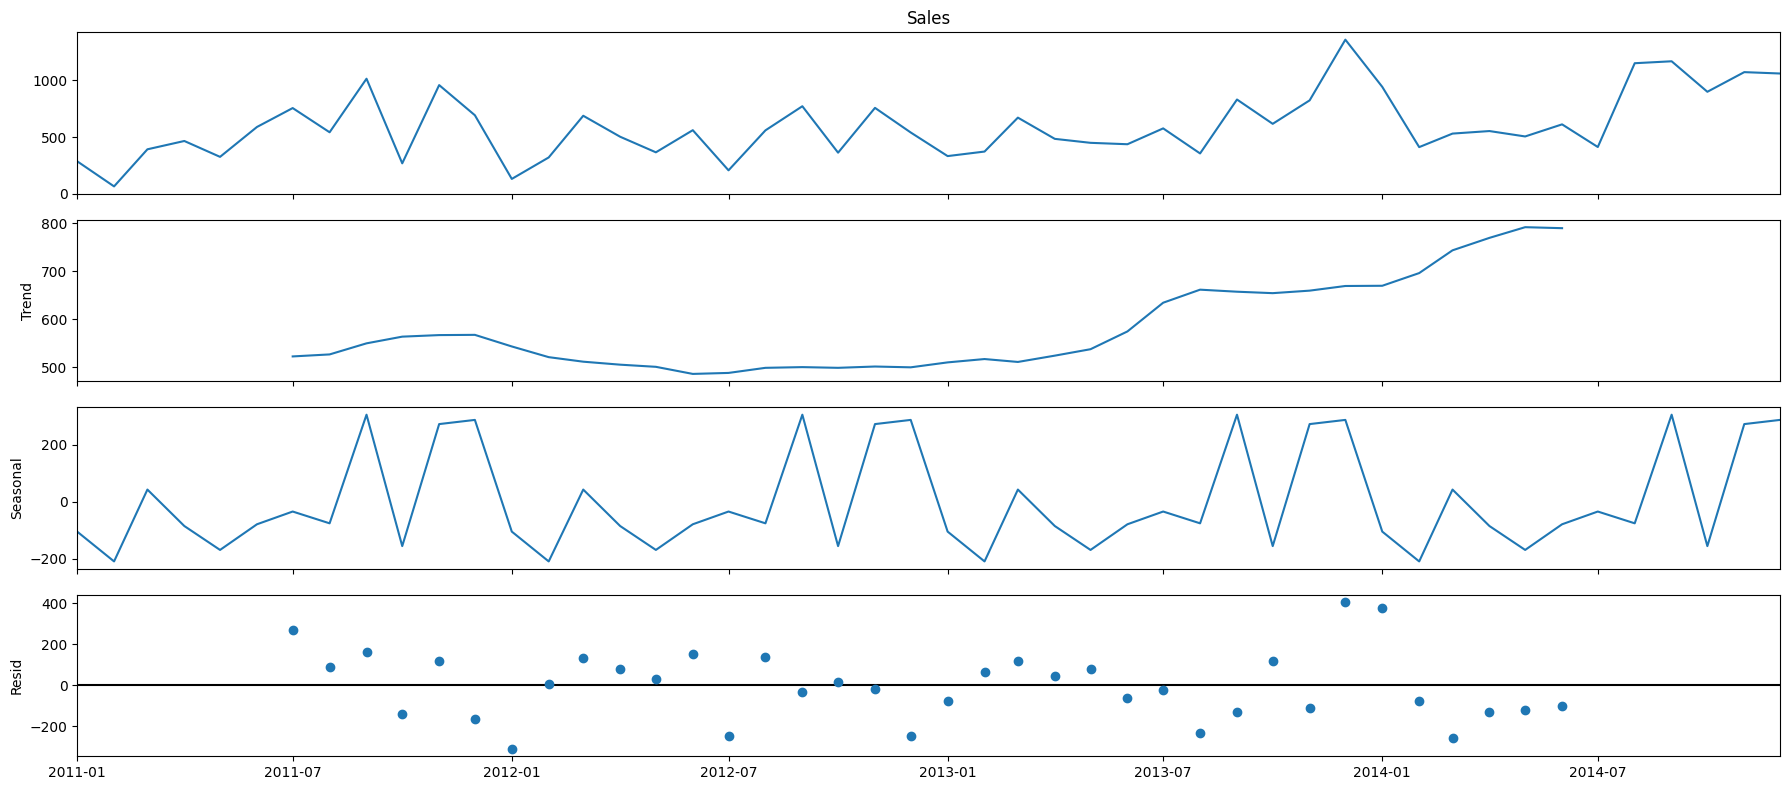

In [16]:
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(df_office, model='additive')
fig = decomposition.plot()
plt.show()

### Check for Stationarity

This is a very important concept in Time Series Analysis. In order to apply a time series model, it is important for the Time series to be stationary; in other words all its statistical properties (mean,variance) remain constant over time.

In [18]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

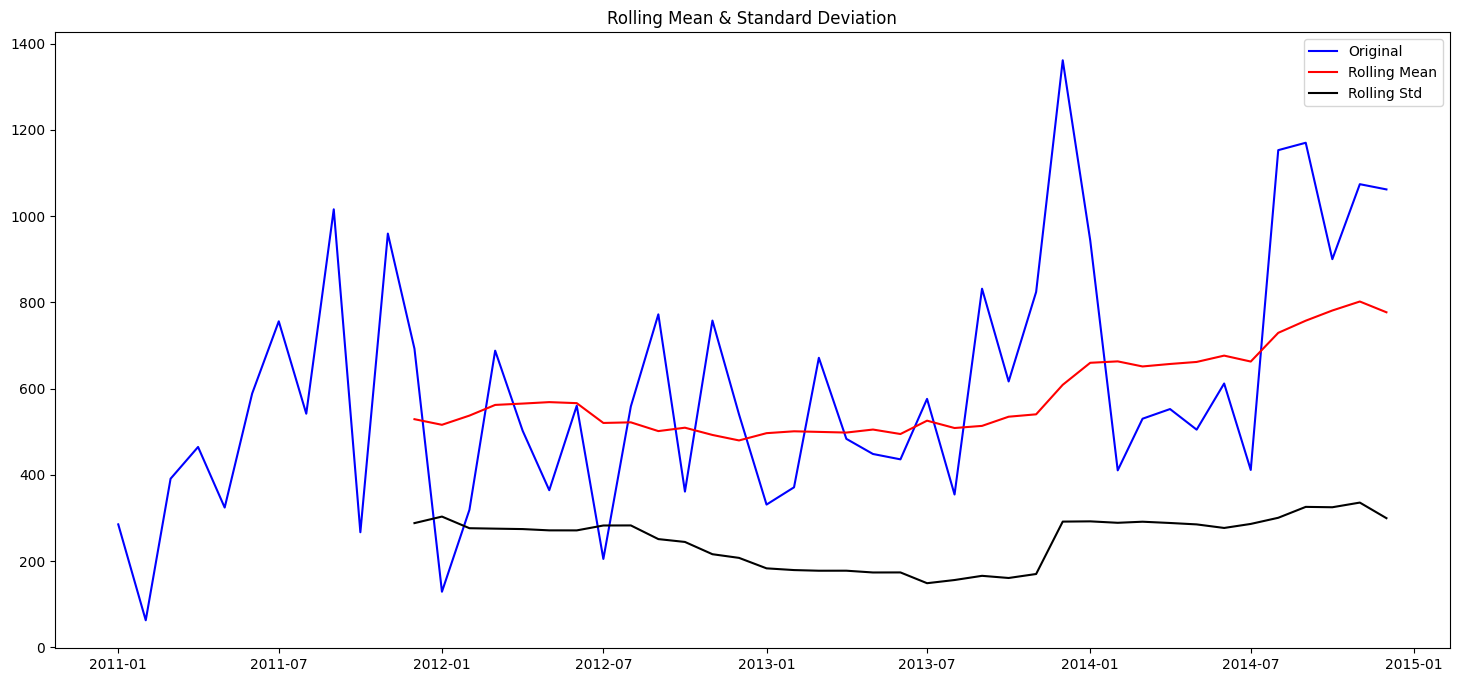

Results of Dickey-Fuller Test:
Test Statistic                 -4.566246
p-value                         0.000149
#Lags Used                      0.000000
Number of Observations Used    47.000000
Critical Value (1%)            -3.577848
Critical Value (5%)            -2.925338
Critical Value (10%)           -2.600774
dtype: float64


In [19]:
test_stationarity(df_office)

## Time series forecasting with ARIMA

ARIMA models are denoted with the notation ARIMA(p, d, q). These three parameters account for seasonality, trend, and noise in data.

In [20]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [21]:
for param in pdq:
    for param_seasonal in seasonal_pdq:

      try:
          mod = sm.tsa.statespace.SARIMAX(df_office,
                                          order=param,
                                          seasonal_order=param_seasonal,
                                          enforce_stationarity=False,
                                          enforce_invertibility=False)
          results = mod.fit()

          print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
      except:
          continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:746.9563723479487


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1498.6018834778401
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:499.2675982566003
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:332.81542693387394
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:514.563548401399


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1472.5854247857053
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:346.46869031388906
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:334.9384891810958
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:702.0237910261417
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2740.3754900899094
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:485.71085561885843
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:318.0827995011045
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:515.3202331069942
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2707.7310473088783


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:343.49886242364755
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:318.63465816178854
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:664.9448348690922
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1421.7964311899468
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:499.1598746464145


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:320.6600612584964
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:496.8067346101202


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1192.9669453420363
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:332.39218539749686
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:320.2886706364219
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:637.0008708125663
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:732.1693786333092
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:472.17487574117484
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:301.60087127160415
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:488.75843129052134
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:1473.4654201121539


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:329.5174271906505
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:302.94840628519336
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:678.9807265212761
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:1705.936150971706
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:499.3930768466406
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:329.35112052900314
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:496.94946924814604


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:1596.2602187399004
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:328.51324865156454
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:330.4713490116391
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:650.9805354486666
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:2728.403339501841
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:486.63000468313373
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:317.90486169055595
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:488.13706632241343
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:2678.354831144405
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:330.3178341391301
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:318.85884713405034
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:657.5265054593768


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1287.9198979630557
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:492.69674591460677
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:319.3362805324501
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:480.8503140392014


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:1353.9669665149324
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:318.9089320830309
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:319.7071722546656
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:638.1523985899378


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:2156.6861221838067
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:473.96301861137056
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:302.891101287859
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:476.85716734601135


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:959.8539928472355
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:316.08893180885235
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:303.9878290829755


#### Above output shows that ARIMA(0, 1, 1)x(0, 1, 1, 12)12 yields the lowest AIC value:301.60087127160415



## Fitting the ARIMA model

In [22]:
# ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:301.60087127160415
mod = sm.tsa.statespace.SARIMAX(df_office,
                                order=(0, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8638      0.218     -3.955      0.000      -1.292      -0.436
ma.S.L12      -1.0098     49.363     -0.020      0.984     -97.759      95.740
sigma2       5.35e+04   2.65e+06      0.020      0.984   -5.15e+06    5.26e+06


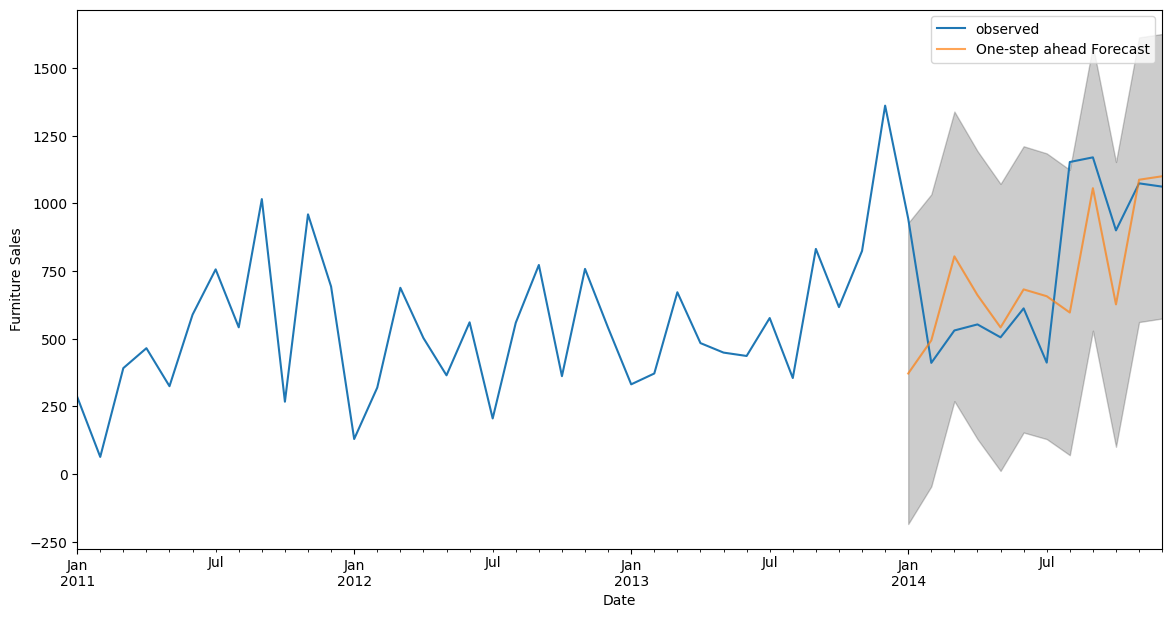

In [23]:
pred = results.get_prediction(start=pd.to_datetime('2014-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = df_office['2011':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()